<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/opencv_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving images.jpg to images.jpg


{'images.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x15\x15\x15\x15\x17\x16\x17\x18\x15\x15\x15\x15\x17\x15\x17\x17\x15\x16\x16\x16\x15\x15\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-\x1d\x1d\x1d---------------------+------------------+---------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x02\x04\x05\x01\x06\x07\x08\xff\xc4\x00=\x10\x00\x01\x03\x02\x04\x02\x07\x06\x05\x03\x03\x05\x01\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Q\x06\x13"aq\x81\x91\x072\xa1\xb1\xc1\xf0\x14BR\xd1\xe1#\x82\xf1\x15br3CS\xa2\xb2$\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00!\x11\x01\x01\x01\x01\x01\x00\x02\x02\x02\x03\x00\x00\x00\x00\x00\x00\x00\x01\x11\x02!\x03\x12

In [55]:
!pip install Image

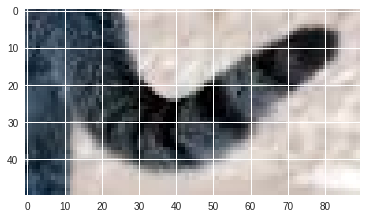

In [75]:
import cv2
#import Image
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ["ENABLE_CV2_IMSHOW"] = 'true'

img = cv2.imread('images.jpg', cv2.IMREAD_COLOR)
img1 = cv2.imread('')
# khoanh vùng hình ảnh
#cv2.rectangle(img,(52,15), (270,180), 5)

# hướng dẫn show ra màn hình bằng 1 vật thể khác
cat_tail = img[90:140,180:270] 

#img [ x, y]
#img[0:90,0:50] = cat_tail
def show_object(image):
  a = plt.figure(figsize=[4,2])
  plt.imshow(cat_tail)
  plt.show()
  
fig = plt.figure(figsize=[6,4])
plt.imshow(cat_tail)
#plt.show()
# save image 
a = plt.savefig('duoi-meo.png')

# chuyển đổi từ png sang jpg

# b = plt.figure(figsize=[6,4])
# plt.imshow(img)  # to hide tick values on X and Y axis
# plt.show()

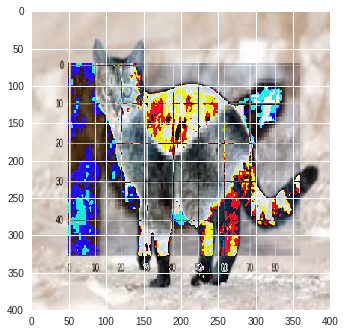

In [82]:
img = cv2.imread('images.jpg', cv2.IMREAD_COLOR)
img1 = cv2.imread('duoi-meo.png', cv2.IMREAD_COLOR)

one = cv2.resize(img, (400,400))
two = cv2.resize(img1, (400,400))

add = one + two
plt.imshow(add)
plt.show()

In [0]:
import matplotlib.pyplot as plt
list1 = [3,4,5,6,9,12]
list2 = [8,12,14,15,17,20]
plt.plot(list1, list2)
plt.savefig('fig1.png', dpi = 300)
plt.close()